In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans_df = pd.read_csv("preprocessed_loans_stage1.csv",low_memory=False)

In [4]:
loans_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_util,debt_settlement_flag,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year
0,0,12000.0,12000.0,12000.0,407.40,40000.0,16.94,0.0,0.0,7.0,...,68.8,N,2013,12,1998,10,2015,9,2017,7
1,1,14000.0,14000.0,14000.0,470.71,88000.0,10.02,1.0,0.0,6.0,...,81.9,N,2013,12,1988,6,2017,1,2018,1
2,2,15000.0,15000.0,15000.0,476.30,63000.0,16.51,0.0,0.0,8.0,...,74.2,N,2013,12,1998,3,2017,1,2016,12
3,3,24000.0,24000.0,24000.0,814.80,100000.0,22.18,0.0,0.0,14.0,...,76.7,N,2013,12,1989,1,2015,12,2018,1
4,4,28000.0,28000.0,28000.0,872.52,325000.0,18.55,0.0,1.0,15.0,...,54.6,N,2013,12,1994,11,2014,8,2014,8


In [27]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321847 entries, 0 to 1321846
Data columns (total 83 columns):
Unnamed: 0                    1321847 non-null int64
loan_amnt                     1321847 non-null float64
funded_amnt                   1321847 non-null float64
funded_amnt_inv               1321847 non-null float64
installment                   1321847 non-null float64
annual_inc                    1321847 non-null float64
dti                           1321847 non-null float64
delinq_2yrs                   1321847 non-null float64
inq_last_6mths                1321847 non-null float64
open_acc                      1321847 non-null float64
pub_rec                       1321847 non-null float64
revol_bal                     1321847 non-null float64
total_acc                     1321847 non-null float64
out_prncp                     1321847 non-null float64
out_prncp_inv                 1321847 non-null float64
total_pymnt                   1321847 non-null float64
total_pym

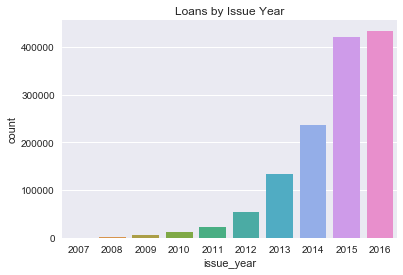

In [32]:
g = sns.countplot(x="issue_year", data=loans_df)
g.set_title(label="Loans by Issue Year")

Number of Loans issued by Lending Tree have increased from 2007 to 2016

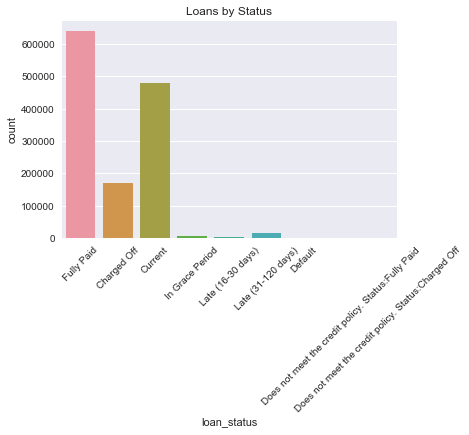

In [33]:
#Lets see the number of loans by loan_status
g = sns.countplot(x="loan_status", data=loans_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(label="Loans by Status")

Fron the above graph we can see the maxium numbers of loans have been by fully paid.The charged off loans are pretty significant.

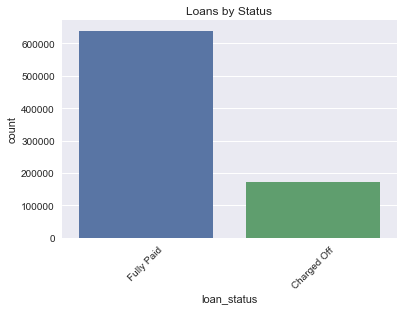

In [6]:
filtered_loans_df = loans_df[(loans_df["loan_status"] == "Fully Paid") |
                            (loans_df["loan_status"] == "Charged Off")]
g = sns.countplot(x="loan_status", data=filtered_loans_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(label="Loans by Status")

From the graph it looks that the ratio of fully paid and charged off loans is 4:1

<h3>Now let examine how some of the features are realated with the target variable (loan_status) </h3>

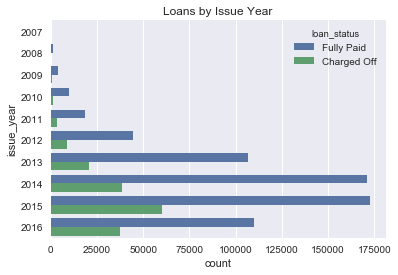

In [36]:
g=sns.countplot(y="issue_year", hue="loan_status", data=filtered_loans_df);
g.set_title(label="Loans by Issue Year")

<p>The number of charged off loans have increased over the years. From the graph , we can say that highest number of charged off loans are in the year 2015 </p>

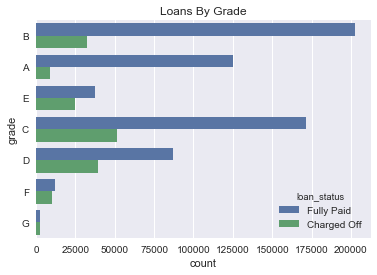

In [37]:
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_df);
g.set_title(label="Loans By Grade")

<p>It is evident from the graph that loans from grade C and D have highest charged off rate</p>

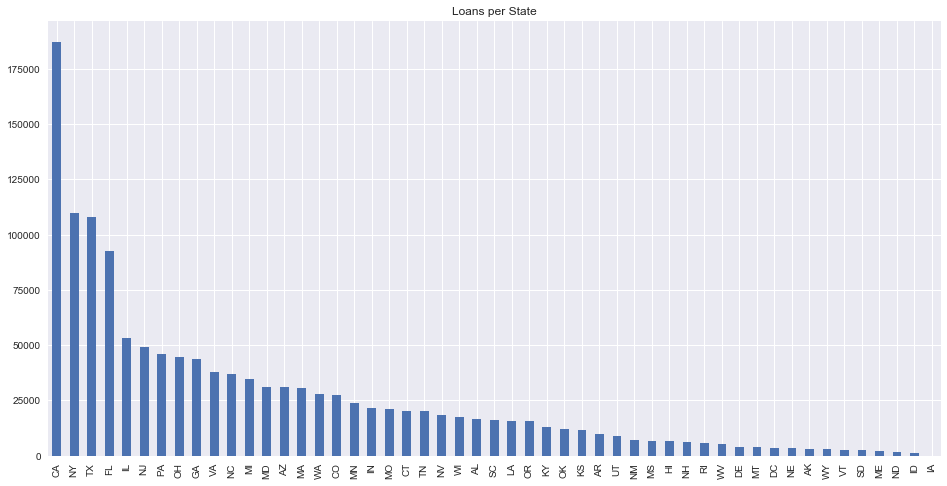

In [38]:
#plot the number of loans per state
state_count = loans_df.addr_state.value_counts()

state_count.plot(kind = 'bar',figsize=(16,8), title = 'Loans per State')

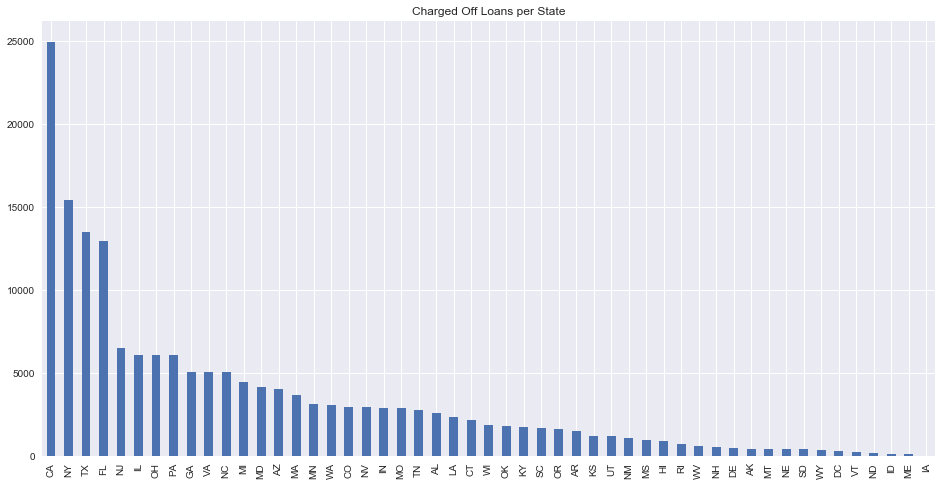

In [23]:
#plot the number of charged loans per state
state_count = filtered_loans_df[filtered_loans_df.loan_status == 'Charged Off'].addr_state.value_counts()

state_count.plot(kind = 'bar',figsize=(16,8), title = 'Charged Off Loans per State')

<p>The highest number of charged off loans are from California and Newyork. IA state has least number of charged off loans <p>

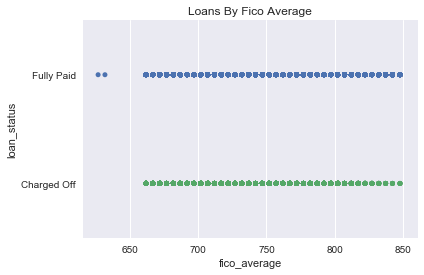

In [49]:
g = sns.stripplot(x="fico_average", y="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Fico Average")


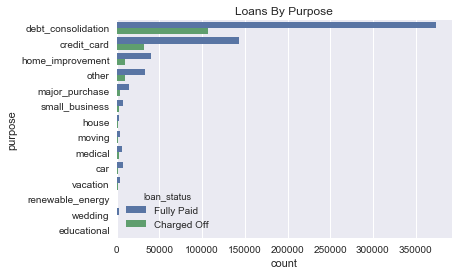

In [24]:
#Plot the graph for loans by purpose
g = sns.countplot(y="purpose", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Purpose")

The above graph shows that the loans with purpose "Debt consolidation" and "credit card" have highest charged off rate

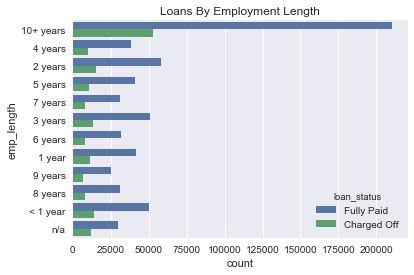

In [11]:
g = sns.countplot(y="emp_length", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Employment Length")

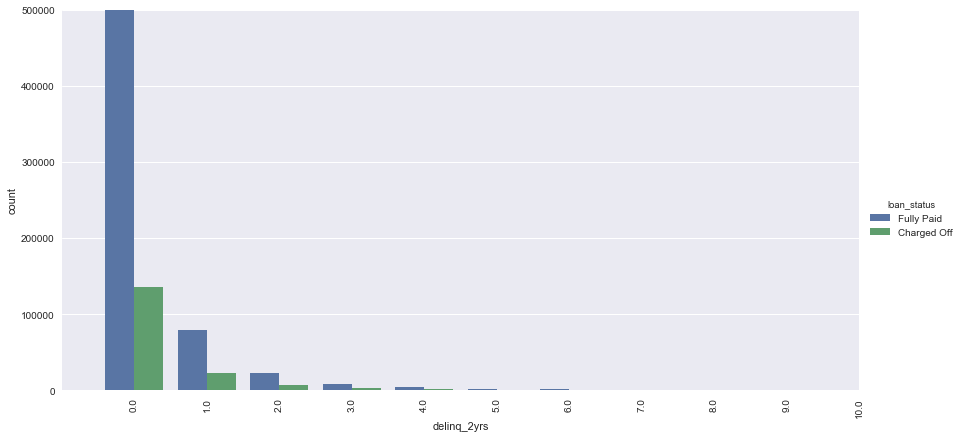

In [63]:
g = sns.factorplot(x='delinq_2yrs', data=filtered_loans_df, 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set(xlim=(-1,10))
g.set(ylim=(0,500000))
g.set_titles("Counting Default by Delinquency")

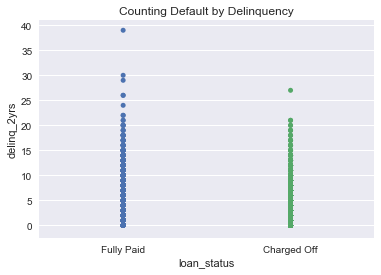

In [16]:
g = sns.stripplot(x="loan_status", y="delinq_2yrs", data=filtered_loans_df);
g.set_title("Counting Default by Delinquency")

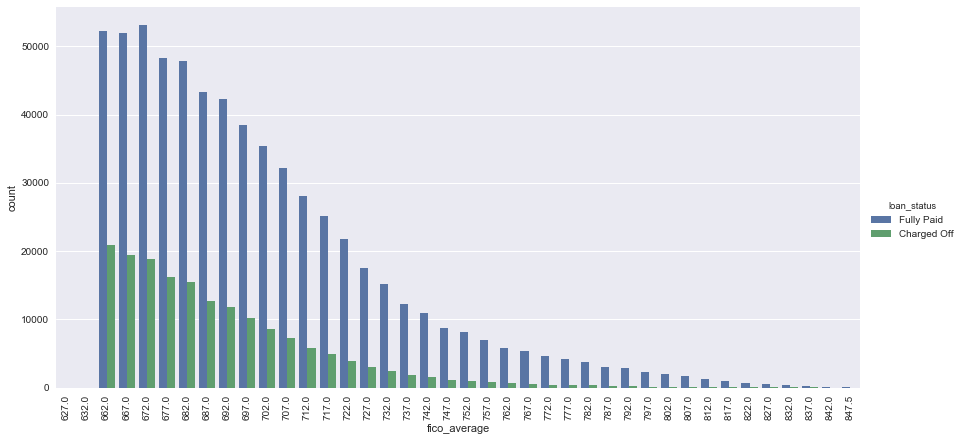

In [11]:
g = sns.factorplot(x='fico_average', data=filtered_loans_df, 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Charged Off by Fico Score")

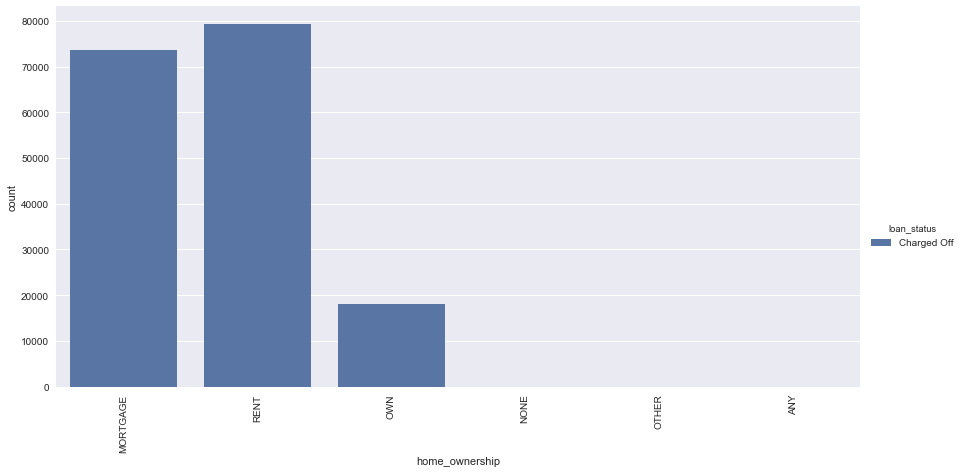

In [14]:
g = sns.factorplot(x='home_ownership', data=loans_df[loans_df["loan_status"] == "Charged Off"], 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Charged off by home ownership")
plt.show()

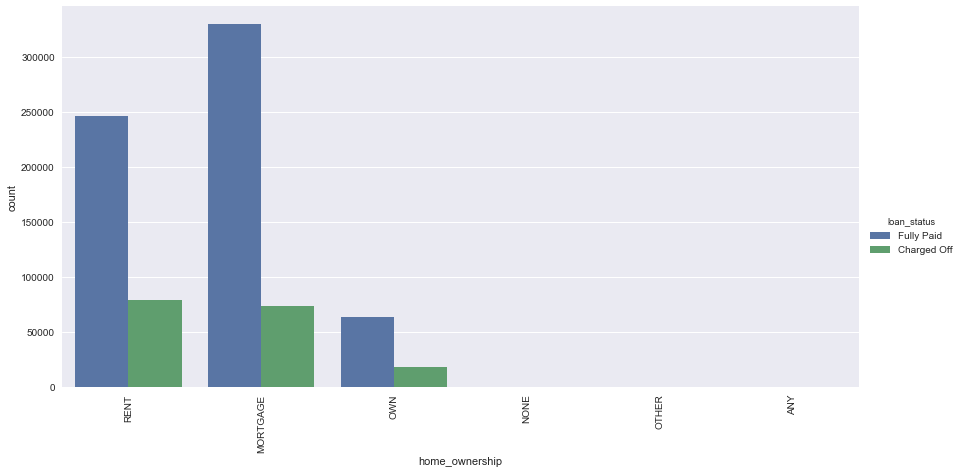

In [17]:
g = sns.factorplot(x='home_ownership', data=filtered_loans_df, 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Loans by home ownership")
plt.show()

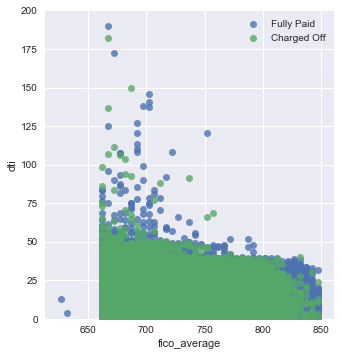

In [19]:
# Use the 'hue' argument to provide a factor variable
g = sns.lmplot( x="fico_average", y="dti", data=filtered_loans_df, fit_reg=False, hue='loan_status', legend=False)
g.set(ylim=(0, 200))
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()

(0, 200)

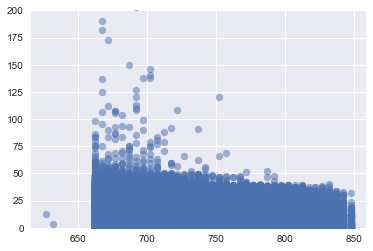

In [25]:
x = filtered_loans_df.fico_average
y = filtered_loans_df.dti
plt.scatter(x, y, alpha=0.5)
plt.ylim((0,200))

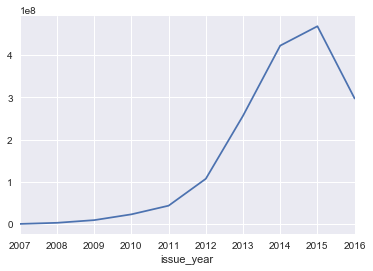

In [48]:
filtered_loans_df.groupby(['issue_year'])['issue_year'].sum().plot()

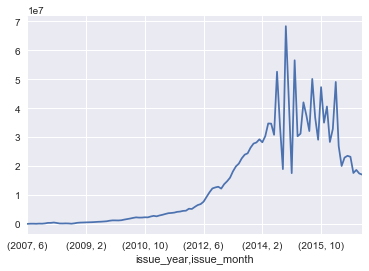

In [47]:
filtered_loans_df.groupby(['issue_year','issue_month'])['issue_year'].sum().plot()